In [3]:
# 현재 커널의 경로를 직접 참조하여 설치
import sys
!{sys.executable} -m pip install pingouin

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 78.2 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.2/38.5 MB 19.7 MB/s eta 0:00:02
   ---------------- ----------------------- 15.7/38.5 MB 42.0 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.5 MB 45.7 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 47.1 MB/s  0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 9.5/9.5 MB 68.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 57.8 MB/s  0:00:00

   -------- -------------------------------  2/10 [scipy]
   -------- -------------------------------  2/10 [scipy]
   -------- -------------------------------  2/10 [scipy]
   -------- --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pingouin

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [6]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [22]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
ost_df = pd.read_csv('./data/04_1.OST.csv', encoding = 'cp949')
ost_df.head()

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3
2,304.9,301.0,301.0,307.9,309.9,307.9
3,305.2,304.0,304.0,305.2,310.2,305.2
4,304.0,304.0,304.0,307.0,309.0,307.0


In [10]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   무게1     102 non-null    float64
 1   무게2     102 non-null    float64
 2   무게3     102 non-null    float64
 3   무게4     102 non-null    float64
 4   무게5     102 non-null    float64
 5   무게6     102 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


In [11]:
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
무게1,102.0,316.44,12.39,242.0,313.92,317.35,322.50,331.8
무게2,102.0,317.13,12.58,242.0,314.73,318.15,323.30,332.6
무게3,102.0,317.14,12.58,242.0,314.73,318.15,323.30,332.6
무게4,102.0,319.35,12.77,242.0,316.92,320.35,325.50,334.8
무게5,102.0,321.35,12.98,242.0,318.92,322.35,327.50,336.8
무게6,102.0,315.97,12.33,242.0,312.52,317.90,320.68,334.8


In [13]:
ost_df.agg({"무게1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T.round(2)

,count,mean,std,min,max,median,skew,kurtosis
무게1,102.0,316.44,12.39,242.0,331.8,317.35,-4.07,22.94


### 3.1 차이가 있는 경우 (two-side)

In [ ]:
# two-side 양측 검정
pg.ttest(ost_df['무게1'], 320, alternative = "two-sided").round(3)

# 다음 step : 정규 분포 가정 검정 후 다시 분석

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.899,101,two-sided,0.005,"[314.01, 318.88]",0.287,5.612,0.819


- T : 검정 통계량
- dof : 자유도 (자유롭게 변화할 수 있는 데이터의 수)
- alternative : 검정 유형 (양측 / 단측)
- p-val : 유의 수준 (p값)
- CI95% : 95% 신뢰 구간
- cohen-d : 효과 크기 (두 집단 간의 평균 차이를 표준 편차로 환산 값)
    - 0.2 : 작은 효과
    - 0.5 : 중간 효과
    - 0.8 : 큰 효과
- BF10 : 베이즈 팩터 (대립가설이 귀무가설보다 데이터를 얼마나 잘 설명하는지 나타냄)
    - 1 < BF10 < 3 : 약한 증거
    - 3 <= BF10 < 10 : 중간 증거
    - 10 <= BF10 < 30 : 강한 증거
    - 30 < : 매우 강한 증거
- power : 검정력 (대립가설이 참일 때 귀무가설을 기각할 확률 (80% 이상이 목표))

### 3.2 단측 검정 (less)

In [15]:
pg.ttest(ost_df['무게2'], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.304,101,less,0.012,"[-inf, 319.2]",0.228,2.727,0.74


In [17]:
pg.ttest(ost_df['무게3'], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.297,101,two-sided,0.024,"[314.67, 319.61]",0.227,1.345,0.624


### 3.3 차이가 없는 경우

In [18]:
#단측검정 (greater)
pg.ttest(ost_df['무게4'], 320, alternative="greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.51,101,greater,0.694,"[317.26, inf]",0.051,0.249,0.016


In [19]:
pg.ttest(ost_df['무게4'], 320, alternative="two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.51,101,two-sided,0.611,"[316.85, 321.86]",0.051,0.124,0.08


### 4.1 정규성 검정
 - shapiro-wilk 검정을 사용하여 데이터의 정규성을 검정
 - False면 귀무가설 기각 (귀무가설 : 정규분포를 따른다) -> 비모수 방법을 채택

In [20]:
pg.normality(ost_df['무게1'])

,W,pval,normal
무게1,0.633649,1.388958e-14,False


### 4.2 이상치 제거

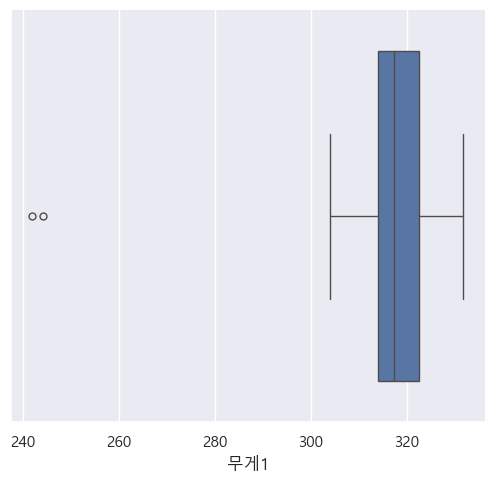

In [23]:
sns.catplot(data = ost_df,
            x = '무게1',
            kind = 'box')

In [24]:
filter = (ost_df['무게1'] <= 250)
ost_df.loc[filter]

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3


In [25]:
ost_df.drop(ost_df[filter].index, inplace=True)

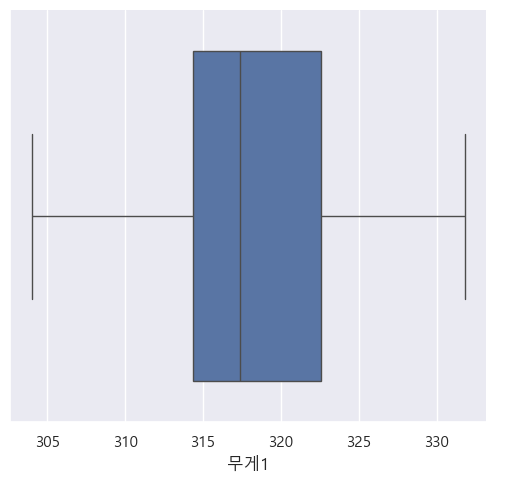

In [26]:
sns.catplot(data = ost_df,
            x = '무게1',
            kind = 'box')
plt.show()

In [28]:
ost_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
무게1,100.0,317.909,6.773,304.0,314.375,317.4,322.575,331.8
무게2,100.0,318.609,6.981,301.0,315.175,318.2,323.375,332.6
무게3,100.0,318.619,6.965,301.0,315.175,318.2,323.375,332.6
무게4,100.0,320.879,6.836,305.2,317.375,320.4,325.575,334.8
무게5,100.0,322.909,6.773,309.0,319.375,322.4,327.575,336.8
무게6,100.0,317.426,6.764,305.2,312.900,317.9,320.750,334.8


In [30]:
pg.normality(ost_df['무게1']).round(3)

,W,pval,normal
무게1,0.982,0.176,True


In [32]:
pg.ttest(ost_df['무게1'], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.087,99,two-sided,0.003,"[316.57, 319.25]",0.309,9.318,0.864


### 4.3 비모수 검정

In [33]:
pg.wilcoxon(ost_df['무게6'] - 320, alternative="two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1377.0,two-sided,0.0,-0.444,NaN


# 연습문제 
 - 04_3.calorie.csv
 - 칼로리 1에 대해서 양측검정을 하고 귀무가설 채택인지 기각인지 서술하시오.
 - 칼로리 1에 대해서 정규성 검정, 이상치 제거 -> 양측 검정